In [1]:
## 마르코프 체인을 활용해 임의의 도, 시별 인구 비율을 예측해본다.

In [2]:
%matplotlib inline
import math
import numpy as np  ## 백터, 행렬 데이터 전문 모듈 numpy
import pandas as pd  ## 고수준 데이터 모델 (DataFrame) 모듈 pandas
import matplotlib.pyplot as plt  ## 차트 그리기 모듈 matplotlib
import scipy.stats as stats      ## 통계 등 과학용 모듈 scipy
from matplotlib import font_manager, rc

In [3]:
# 파일 불러오고 처음 5개의 데이터만 보기

In [4]:
df = pd.read_csv("./input/move.csv",encoding = "euc-kr")
dp = pd.read_csv("./input/현재인구.csv",encoding = "euc-kr")
df.head()

,전출지별,전입지별,항목,단위,2012. 01 월,2012. 02 월,2012. 03 월,2012. 04 월,2012. 05 월,2012. 06 월,...,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,2018. 09 월,2018. 10 월,Unnamed: 86
0,서울특별시,서울특별시,이동자수,명,71818,107836,104621,95985,94388,78802,...,86159,95779,81355,82754,76542,77400,78487,62891,94388,NaN
1,서울특별시,부산광역시,이동자수,명,1389,2031,1770,1444,1201,1041,...,1591,1497,1101,962,939,989,1101,763,988,NaN
2,서울특별시,대구광역시,이동자수,명,903,1209,1084,749,688,682,...,1008,881,675,614,638,635,666,522,596,NaN
3,서울특별시,인천광역시,이동자수,명,3515,5054,4580,4225,4087,3458,...,4095,4049,3537,3459,2958,3241,3141,2395,3455,NaN
4,서울특별시,광주광역시,이동자수,명,887,1379,1213,853,718,609,...,841,856,539,585,513,577,615,457,559,NaN


In [5]:
dp.head()

,행정구역별(1),2018
0,행정구역별(1),추계인구
1,서울특별시,9721190
2,부산광역시,3418011
3,대구광역시,2459284
4,인천광역시,2942005


In [6]:
dp['행정구역별(1)']

0     행정구역별(1)
1        서울특별시
2        부산광역시
3        대구광역시
4        인천광역시
5        광주광역시
6        대전광역시
7        울산광역시
8      세종특별자치시
9          경기도
10         강원도
11        충청북도
12        충청남도
13        전라북도
14        전라남도
15        경상북도
16        경상남도
17     제주특별자치도
Name: 행정구역별(1), dtype: object

In [7]:
# column의 원소들 보기

In [8]:
df.shape

(289, 87)

In [9]:
df.columns

Index(['전출지별', '전입지별', '항목', '단위', '2012. 01 월', '2012. 02 월', '2012. 03 월',
       '2012. 04 월', '2012. 05 월', '2012. 06 월', '2012. 07 월', '2012. 08 월',
       '2012. 09 월', '2012. 10 월', '2012. 11 월', '2012. 12 월', '2013. 01 월',
       '2013. 02 월', '2013. 03 월', '2013. 04 월', '2013. 05 월', '2013. 06 월',
       '2013. 07 월', '2013. 08 월', '2013. 09 월', '2013. 10 월', '2013. 11 월',
       '2013. 12 월', '2014. 01 월', '2014. 02 월', '2014. 03 월', '2014. 04 월',
       '2014. 05 월', '2014. 06 월', '2014. 07 월', '2014. 08 월', '2014. 09 월',
       '2014. 10 월', '2014. 11 월', '2014. 12 월', '2015. 01 월', '2015. 02 월',
       '2015. 03 월', '2015. 04 월', '2015. 05 월', '2015. 06 월', '2015. 07 월',
       '2015. 08 월', '2015. 09 월', '2015. 10 월', '2015. 11 월', '2015. 12 월',
       '2016. 01 월', '2016. 02 월', '2016. 03 월', '2016. 04 월', '2016. 05 월',
       '2016. 06 월', '2016. 07 월', '2016. 08 월', '2016. 09 월', '2016. 10 월',
       '2016. 11 월', '2016. 12 월', '2017. 01 월', '2017. 02 월', '2017. 03 월',

In [10]:
dp.columns

Index(['행정구역별(1)', '2018'], dtype='object')

In [11]:
# 필요한 행만 뽑아내기

In [12]:
df2= df[['2012. 01 월', '2012. 02 월', '2012. 03 월',
       '2012. 04 월', '2012. 05 월', '2012. 06 월', '2012. 07 월', '2012. 08 월',
       '2012. 09 월', '2012. 10 월', '2012. 11 월', '2012. 12 월', '2013. 01 월',
       '2013. 02 월', '2013. 03 월', '2013. 04 월', '2013. 05 월', '2013. 06 월',
       '2013. 07 월', '2013. 08 월', '2013. 09 월', '2013. 10 월', '2013. 11 월',
       '2013. 12 월', '2014. 01 월', '2014. 02 월', '2014. 03 월', '2014. 04 월',
       '2014. 05 월', '2014. 06 월', '2014. 07 월', '2014. 08 월', '2014. 09 월',
       '2014. 10 월', '2014. 11 월', '2014. 12 월', '2015. 01 월', '2015. 02 월',
       '2015. 03 월', '2015. 04 월', '2015. 05 월', '2015. 06 월', '2015. 07 월',
       '2015. 08 월', '2015. 09 월', '2015. 10 월', '2015. 11 월', '2015. 12 월',
       '2016. 01 월', '2016. 02 월', '2016. 03 월', '2016. 04 월', '2016. 05 월',
       '2016. 06 월', '2016. 07 월', '2016. 08 월', '2016. 09 월', '2016. 10 월',
       '2016. 11 월', '2016. 12 월', '2017. 01 월', '2017. 02 월', '2017. 03 월',
       '2017. 04 월', '2017. 05 월', '2017. 06 월', '2017. 07 월', '2017. 08 월',
       '2017. 09 월', '2017. 10 월', '2017. 11 월', '2017. 12 월', '2018. 01 월',
       '2018. 02 월', '2018. 03 월', '2018. 04 월', '2018. 05 월', '2018. 06 월',
       '2018. 07 월', '2018. 08 월', '2018. 09 월', '2018. 10 월']]

In [13]:
df2

,2012. 01 월,2012. 02 월,2012. 03 월,2012. 04 월,2012. 05 월,2012. 06 월,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,...,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,2018. 09 월,2018. 10 월
0,71818,107836,104621,95985,94388,78802,79972,80951,74031,99740,...,74820,86159,95779,81355,82754,76542,77400,78487,62891,94388
1,1389,2031,1770,1444,1201,1041,1212,1343,1025,1225,...,1311,1591,1497,1101,962,939,989,1101,763,988
2,903,1209,1084,749,688,682,763,842,691,795,...,955,1008,881,675,614,638,635,666,522,596
3,3515,5054,4580,4225,4087,3458,3853,4142,3641,4556,...,3943,4095,4049,3537,3459,2958,3241,3141,2395,3455
4,887,1379,1213,853,718,609,731,746,644,790,...,763,841,856,539,585,513,577,615,457,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,84,86,54,32,45,40,40,44,35,29,...,79,112,82,70,67,58,68,57,53,68
285,87,140,105,71,79,66,73,62,86,67,...,134,131,120,112,103,68,107,92,58,121
286,47,84,62,70,63,51,48,50,59,52,...,132,134,97,94,83,60,90,122,84,81
287,147,191,121,96,88,58,72,97,79,96,...,195,199,185,102,157,131,104,160,107,165


원소가 줄어들었음을 확인한다.

In [14]:
df2.shape

(289, 82)

In [15]:
# 데이터를 행렬로 계산하기위해 데이터 타입을 numpy로 변경 + 행렬을 소수로 계산하기위해  datatype 도 변경

In [17]:
df2=np.array(df2).astype('float32')

In [19]:
df2T=df2.T

In [20]:
markovchain=np.identity(17)

In [21]:
df2.T[0].reshape(17,17)

(17, 17)

In [24]:
df2.T[0].reshape(17, 17)

array([[7.1818e+04, 1.3890e+03, 9.0300e+02, 3.5150e+03, 8.8700e+02,
        1.3050e+03, 5.3100e+02, 1.5500e+02, 2.4487e+04, 1.8010e+03,
        1.1650e+03, 1.6960e+03, 1.3830e+03, 1.2610e+03, 1.2300e+03,
        1.3460e+03, 5.0600e+02],
       [1.9460e+03, 2.5438e+04, 5.1200e+02, 2.4800e+02, 1.3200e+02,
        2.2600e+02, 9.5100e+02, 3.3000e+01, 1.5420e+03, 1.8500e+02,
        1.6600e+02, 3.2000e+02, 1.4500e+02, 2.8600e+02, 9.1100e+02,
        4.8970e+03, 1.7300e+02],
       [1.1780e+03, 4.7100e+02, 1.7140e+04, 1.4900e+02, 7.8000e+01,
        2.4800e+02, 3.0600e+02, 1.3000e+01, 1.1630e+03, 1.4400e+02,
        1.6900e+02, 2.4800e+02, 8.3000e+01, 7.1000e+01, 3.6500e+03,
        8.0300e+02, 6.7000e+01],
       [2.4780e+03, 2.0600e+02, 1.4100e+02, 1.7839e+04, 1.8200e+02,
        2.5900e+02, 7.5000e+01, 4.0000e+01, 4.7460e+03, 3.9700e+02,
        3.0300e+02, 6.6800e+02, 2.9000e+02, 3.1300e+02, 2.8100e+02,
        3.2700e+02, 1.5600e+02],
       [1.0560e+03, 9.4000e+01, 4.8000e+01, 1.7100e+

In [25]:
for u in range(82):
    a=df2T[u].reshape(17,17)
    for row in range(0,17):
        local_sum=0
        for col in range(0,17):
            local_sum=local_sum+a[row][col]
        for col in range(0,17):
            a[row][col]=a[row][col]/local_sum
    markovchain=np.dot(markovchain,a)

In [28]:
markovchain

array([[0.19068196, 0.04470534, 0.03698257, 0.05759699, 0.02853569,
        0.03030508, 0.0123831 , 0.0166269 , 0.32727692, 0.02961538,
        0.03514062, 0.04299075, 0.02800491, 0.02522624, 0.03543548,
        0.04331189, 0.01518012],
       [0.19068193, 0.0447054 , 0.03698262, 0.05759698, 0.02853567,
        0.03030507, 0.01238312, 0.0166269 , 0.32727683, 0.02961537,
        0.03514061, 0.04299074, 0.0280049 , 0.02522623, 0.03543552,
        0.04331195, 0.01518012],
       [0.19068193, 0.04470539, 0.03698261, 0.05759698, 0.02853567,
        0.03030507, 0.01238312, 0.0166269 , 0.32727684, 0.02961537,
        0.03514061, 0.04299074, 0.0280049 , 0.02522623, 0.03543551,
        0.04331194, 0.01518012],
       [0.19068197, 0.04470534, 0.03698257, 0.057597  , 0.02853569,
        0.03030508, 0.0123831 , 0.0166269 , 0.32727692, 0.02961538,
        0.03514062, 0.04299075, 0.02800491, 0.02522624, 0.03543548,
        0.04331189, 0.01518012],
       [0.19068198, 0.04470533, 0.03698256, 0.057597

In [30]:
psum=0
for j in range(0,17):
    for i in range(0,17):
        psum=psum+markovchain[i][j]
print("{}%의 오차를 갖는다.".format(1 - psum/17))

4.1680552675948945e-08%의 오차를 갖는다.


In [37]:
# 상태안정 행렬 비율

In [41]:
stable = markovchain.sum(axis = 1)

In [49]:
markovchain

array([[0.19068196, 0.04470534, 0.03698257, 0.05759699, 0.02853569,
        0.03030508, 0.0123831 , 0.0166269 , 0.32727692, 0.02961538,
        0.03514062, 0.04299075, 0.02800491, 0.02522624, 0.03543548,
        0.04331189, 0.01518012],
       [0.19068193, 0.0447054 , 0.03698262, 0.05759698, 0.02853567,
        0.03030507, 0.01238312, 0.0166269 , 0.32727683, 0.02961537,
        0.03514061, 0.04299074, 0.0280049 , 0.02522623, 0.03543552,
        0.04331195, 0.01518012],
       [0.19068193, 0.04470539, 0.03698261, 0.05759698, 0.02853567,
        0.03030507, 0.01238312, 0.0166269 , 0.32727684, 0.02961537,
        0.03514061, 0.04299074, 0.0280049 , 0.02522623, 0.03543551,
        0.04331194, 0.01518012],
       [0.19068197, 0.04470534, 0.03698257, 0.057597  , 0.02853569,
        0.03030508, 0.0123831 , 0.0166269 , 0.32727692, 0.02961538,
        0.03514062, 0.04299075, 0.02800491, 0.02522624, 0.03543548,
        0.04331189, 0.01518012],
       [0.19068198, 0.04470533, 0.03698256, 0.057597

In [78]:
print('markovchain - markovchain ^ 2 = ', y1_value - y2_value)

markovchain - markovchain ^ 2 =  [ 3.66084629e-08  1.51269633e-07  1.19549875e-07 -2.99084646e-09
 -6.20230717e-09  7.11740389e-09  3.52555906e-08  2.62943006e-09
  1.08001208e-08  4.93353458e-09  8.32546521e-09  7.49659912e-09
 -4.72516115e-09  2.36333969e-09  8.98681561e-08  1.40404930e-07
  9.65144170e-09]


In [79]:
# 서울로의 인구 이동 비율보다 경기도로의 이동 비율이 늘어남
# 서울과 경기도를 제외하고 모든 도시는 1.0을 넘지 못함

In [80]:
# 마코프 안정상태의 인구 비율

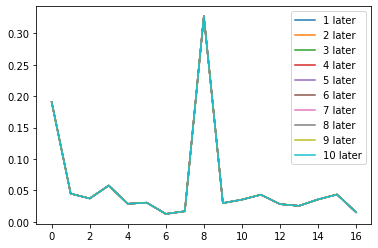

In [94]:
now = np.array([1 / 17 for _ in range(17)])
for _ in range(1, 11):
    now = np.dot(markovchain.T, now)
    plt.plot(now, label = str(_) + ' later')
    plt.legend()
plt.show()

In [95]:
# 2018년 10월 인구를 기준으로, 서울의 인구가 전체의 약 21%가 밀집해 있을경우, 인구이동의 행렬이 안정화를 그리게 됨을 알수있다.